<a href="https://colab.research.google.com/github/raido23/2022raido23/blob/main/5%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. 지역별 어떤 도서관이 있는지
##2. 해당 도서관의 문학 장서 수 그리고 도서관 이용객과의 관계를 알아보고자 해봤습니다.
활용 자료 도서관 이용자 데이터 https://docs.google.com/spreadsheets/d/1O0d2_L_7fY3YUYJvBf5K12m27Av3ky8RoIq8_ITkqdY/edit?usp=sharing

도서관 종류별 장서 현황 
https://docs.google.com/spreadsheets/d/1aVxSN-oJGOo_iA_LvniqV5fVVK9a2tjHhvAzjA1xzAs/edit?usp=sharing

을 공공데이터포탈에서 찾아서 해봤습니다.

가설 : 개인적인 경험을 토대로 '소설이나 문학작품이 많아야 사람들이 자주 올것이다.' 라는 가설을 토대로 해봤습니다만.. 코로나 때문에 규칙성은 발견하지 못했습니다.



/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


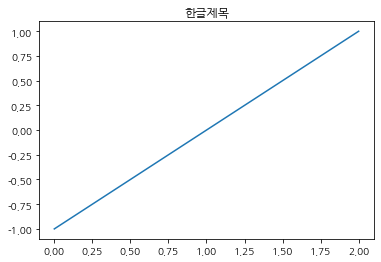

In [ ]:
!apt-get install fonts-nanum -qq > /dev/null # 한글폰트설치
!fc-cache -fv
import matplotlib as mpl 
mpl.font_manager._rebuild()
findfont = mpl.font_manager.fontManager.findfont
mpl.font_manager.findfont = findfont
mpl.backends.backend_agg.findfont = findfont

import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.title('한글제목')
plt.plot([-1,0,1])
plt.show()

어느지역의 도서관 자료를 보시겠습니까? : 천안
천안청수도서관
천안아산상생협력센터도서관
천안시문화도서관본부 신방도서관
천안시문화도서관본부 아우내도서관
천안시문화도서관본부 두정도서관
천안시문화도서관본부 도솔도서관
천안시문화도서관본부 중앙도서관
천안시문화도서관본부 성거도서관
천안시문화도서관본부 쌍용도서관
충청남도천안교육지원청성환도서관
충청남도교육청평생교육원
충청남도교육청학생교육문화원
도서관 이름을 입력해주세요 : 천안청수


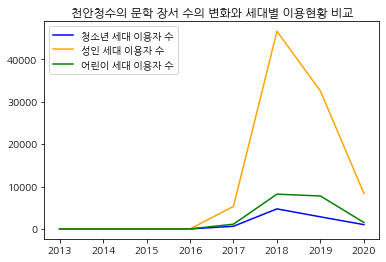

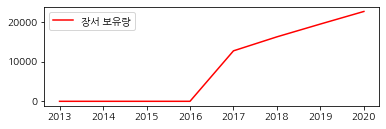

In [ ]:
import matplotlib.pyplot as plt
import csv
data1 = csv.reader(open('book.csv'))
name1 = input('어느지역의 도서관 자료를 보시겠습니까? : ')
for row in data1 :
  if name1 in row[0] :
    print(row[1])

import csv
data1 = csv.reader(open('book.csv'))
data2 = csv.reader(open('read.csv'))
name2 = input('도서관 이름을 입력해주세요 : ')
next(data2)
booklist = []
readerlist = []
for row in data1 :
  if name2 in row[1] :
    for i in range(1,9) :
      booklist.append(int(row[20*i-10]))

reader_c=[]
reader_y=[]
reader_a=[]

for row in data2 :
  if name2 in row[1]  :
     for x in range(1,9) : 
      reader_y.append(int(row[3*x]))
      reader_c.append(int(row[3*x-1]))
      reader_a.append(int(row[3*x+1]))


year = range(2013,2021)
plt.title(name2 + '의 문학 장서 수의 변화와 세대별 이용현황 비교')
plt.plot(year,reader_y, c='blue', label = '청소년 세대 이용자 수')
plt.plot(year,reader_a, c='orange', label = '성인 세대 이용자 수')
plt.plot(year,reader_c, c='green', label = '어린이 세대 이용자 수')
plt.legend()
plt.show()

plt.subplot(2, 1, 2)
plt.plot(year,booklist, c='red', label = '장서 보유량')
plt.legend()
plt.show()


